# Data Science for Cybersecurity Term Project

Dataset: [Detecting Malicious URLs](http://www.sysnet.ucsd.edu/projects/url/)





##Feature Details
1. The data set consists of about 2.4 million URLs (examples) and 3.2 million features.
2. There’s 120-day subset of ICML-09 data
3. FeatureTypes --- A text file list of feature indices that correspond to real-valued features.
4. DayX.svm (where X is an integer from 0 to 120) --- The data for day X in SVM-light format. A label of +1 corresponds to a malicious URL and -1 corresponds to a benign URL.

For example, the data stored in Day0.svm has one scipy.sparse.csr.csr_matrix which contains feature values, and one numpy’s ndarray contains the dataset’s target. The number of record in Day0’s feature is 16,000, and the number of features is 3,231,949. 


## Problem
Develop an online learning algorithm to process large numbers of examples and adapt quickly to evolving URLs over time, and predict the url’s labels and if the url is malicious or not through its url features.


## Preprocess


### Load .svm files and try to find what the features are representing

In [0]:
!wget http://www.sysnet.ucsd.edu/projects/url/url_svmlight.tar.gz -O url_svmlight.tar.gz

--2020-06-15 14:06:13--  http://www.sysnet.ucsd.edu/projects/url/url_svmlight.tar.gz
Resolving www.sysnet.ucsd.edu (www.sysnet.ucsd.edu)... 137.110.222.10
Connecting to www.sysnet.ucsd.edu (www.sysnet.ucsd.edu)|137.110.222.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245011835 (234M) [application/x-gzip]
Saving to: ‘url_svmlight.tar.gz’

url_svmlight.tar.gz 100%[===================>] 233.66M  42.7MB/s    in 5.9s    

2020-06-15 14:06:19 (39.7 MB/s) - ‘url_svmlight.tar.gz’ saved [245011835/245011835]



In [0]:
!tar zxvf url_svmlight.tar.gz

url_svmlight/
url_svmlight/Day33.svm
url_svmlight/Day32.svm
url_svmlight/Day53.svm
url_svmlight/Day20.svm
url_svmlight/Day7.svm
url_svmlight/Day117.svm
url_svmlight/Day54.svm
url_svmlight/Day68.svm
url_svmlight/Day25.svm
url_svmlight/Day60.svm
url_svmlight/Day19.svm
url_svmlight/Day96.svm
url_svmlight/Day4.svm
url_svmlight/Day72.svm
url_svmlight/Day49.svm
url_svmlight/Day70.svm
url_svmlight/Day21.svm
url_svmlight/Day109.svm
url_svmlight/Day91.svm
url_svmlight/Day15.svm
url_svmlight/Day103.svm
url_svmlight/Day85.svm
url_svmlight/Day24.svm
url_svmlight/Day75.svm
url_svmlight/Day93.svm
url_svmlight/Day17.svm
url_svmlight/Day108.svm
url_svmlight/Day57.svm
url_svmlight/Day22.svm
url_svmlight/Day45.svm
url_svmlight/Day40.svm
url_svmlight/Day12.svm
url_svmlight/Day61.svm
url_svmlight/Day86.svm
url_svmlight/Day43.svm
url_svmlight/Day34.svm
url_svmlight/Day59.svm
url_svmlight/Day82.svm
url_svmlight/Day6.svm
url_svmlight/Day37.svm
url_svmlight/Day9.svm
url_svmlight/Day71.svm
url_svmlight/Day100.

In [0]:
!ls -al

total 239296
drwxr-xr-x 1 root root      4096 Jun 15 14:06 .
drwxr-xr-x 1 root root      4096 Jun 15 13:58 ..
drwxr-xr-x 1 root root      4096 Jun 10 16:28 .config
drwxr-xr-x 1 root root      4096 Jun 10 16:28 sample_data
drwxr-xr-x 2 1000 1000      4096 Jul  8  2009 url_svmlight
-rw-r--r-- 1 root root 245011835 Jul  8  2009 url_svmlight.tar.gz


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [0]:
#  Read real value FeatureType
f = open('url_svmlight/FeatureTypes')
fstr = f.read()
fstr

'4\n5\n6\n8\n11\n16\n17\n18\n19\n21\n22\n23\n30\n33\n35\n39\n41\n43\n55\n57\n59\n61\n63\n65\n67\n69\n71\n73\n75\n77\n79\n81\n83\n85\n87\n89\n91\n93\n95\n97\n99\n101\n103\n105\n107\n109\n111\n113\n120\n126\n132\n134\n136\n138\n140\n142\n144\n146\n148\n150\n161\n194\n270\n7801\n'

In [0]:
f.close()
flist = fstr.split('\n')
flist = flist[:-1]
flist = [int(x) for x in flist]
print(len(flist))
print(flist)

64
[4, 5, 6, 8, 11, 16, 17, 18, 19, 21, 22, 23, 30, 33, 35, 39, 41, 43, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 120, 126, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 161, 194, 270, 7801]


In [0]:
# Get `.svm` file content
from joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

# get .svm
@mem.cache
def get_data(path):
    data = load_svmlight_file(path)
    return data[0], data[1]

In [0]:
# get all .svm files
X_files = []
y_files = []
for i in range(121):
  X, y = get_data(path=f"url_svmlight/Day{i}.svm")
  X_files.append(X)
  y_files.append(y)

________________________________________________________________________________
[Memory] Calling __main__--content-__ipython-input__.get_data...
get_data(path='url_svmlight/Day0.svm')
_________________________________________________________get_data - 0.9s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--content-__ipython-input__.get_data...
get_data(path='url_svmlight/Day1.svm')
_________________________________________________________get_data - 1.1s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--content-__ipython-input__.get_data...
get_data(path='url_svmlight/Day2.svm')
_________________________________________________________get_data - 1.0s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__--content-__ipython-input__.get_data...
get_data(path='url_svmlight/Day3.svm')
_________________

### Convert dataset from csr_matrix to dataframe and Sampling
ive tried to use random over sample but i dont know how to use it and make the df even bigger so i decide to use sample according to weights

In [0]:
# csr_matrix只擷取特定Columns
# 只選取FeatureType中列出的real-valued features，如果選取全部的欄位再轉為DataFrame會導致記憶體不足
def getSingleDay(svm, flist):
  X = svm[:, flist]
  df = pd.DataFrame(X.toarray())
  return df

In [0]:
df = pd.DataFrame()
for svm in X_files:
  df = pd.concat([df, getSingleDay(svm, flist)])
print(df.shape)

(2396130, 64)


In [0]:
# Sampling
le = LabelEncoder()
df['target'] = le.fit_transform(pd.Series(np.concatenate(y_files)))
benign = df.loc[df['target']==0]
malicious = df.loc[df['target']==1]

n_samples = int(df.shape[0]*0.005)
benign = benign.sample(n=n_samples, random_state=1)
malicious = malicious.sample(n=n_samples, random_state=1)
df_sample = pd.concat([benign, malicious])
print(benign.shape, malicious.shape)
df_sample.head()

(11980, 65) (11980, 65)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
13118,0.144828,0.117647,0.0,1.0,0.0,0.819947,0.809117,0.370874,0.0,0.000496,0.000496,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7212,0.124138,0.117647,0.0,0.0,0.0,0.664033,0.762036,0.575339,0.0,0.011905,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4542,0.110345,0.117647,0.0,0.0,0.0,0.682786,0.850721,0.905985,0.0,0.005952,0.000000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1006,0.096552,0.176471,0.0,0.0,0.0,0.636552,0.825427,0.125932,0.0,0.005952,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
13232,0.179310,0.117647,0.0,0.0,0.0,0.685034,0.793962,0.653416,1.0,0.142857,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [0]:
df = df_sample.drop(['target'], axis=1)
y = df_sample['target']
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
13118,0.144828,0.117647,0.0,1.0,0.0,0.819947,0.809117,0.370874,0.0,0.000496,0.000496,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7212,0.124138,0.117647,0.0,0.0,0.0,0.664033,0.762036,0.575339,0.0,0.011905,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4542,0.110345,0.117647,0.0,0.0,0.0,0.682786,0.850721,0.905985,0.0,0.005952,0.000000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,0.096552,0.176471,0.0,0.0,0.0,0.636552,0.825427,0.125932,0.0,0.005952,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13232,0.179310,0.117647,0.0,0.0,0.0,0.685034,0.793962,0.653416,1.0,0.142857,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Correlation and EDA


In [0]:
df_sample.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39,       40,       41,
             42,       43,       44,       45,       46,       47,       48,
             49,       50,       51,       52,       53,       54,       55,
             56,       57,       58,       59,       60,       61,       62,
             63, 'target'],
      dtype='object')

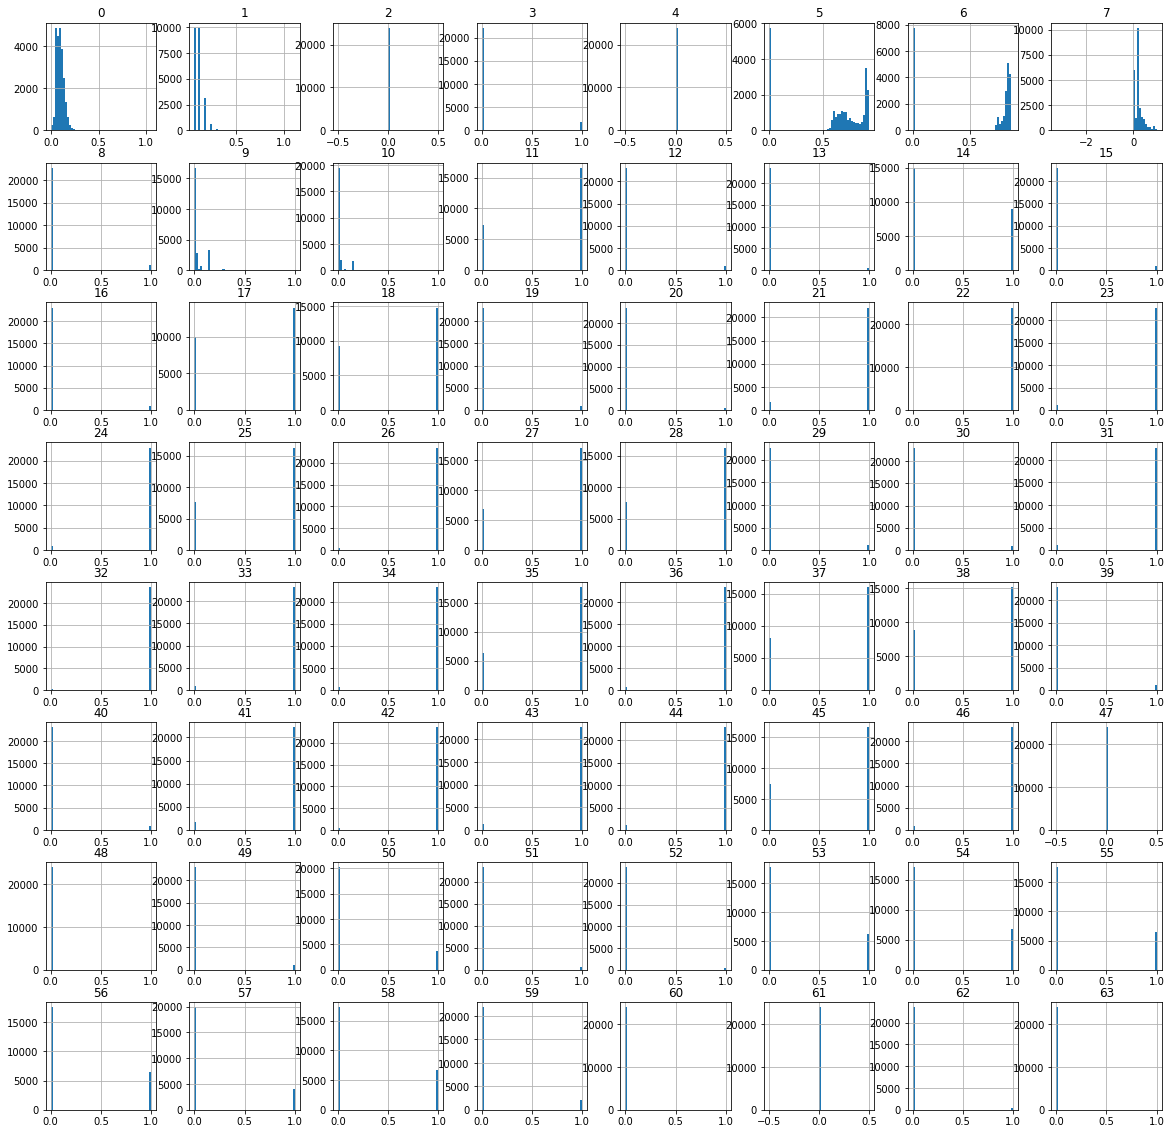

In [0]:
df.hist(bins=50, figsize=(20,20))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


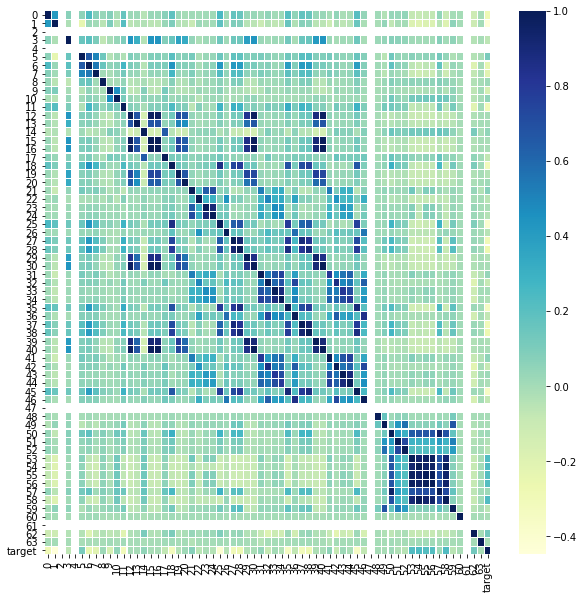

In [0]:
import seaborn as sns

corr = df_sample.corr()
plt.figure(figsize=(10,10))      # Sample figsize in inches
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=False,
        cmap="YlGnBu",
        linewidths=0.1,
        linecolor='white')

### Filter Features

In [0]:
from sklearn.preprocessing import MinMaxScaler
df_normalized = pd.DataFrame(MinMaxScaler().fit_transform(df), columns = df.columns, index = df.index)

In [0]:
# Threshold = 0.5
df_discrete = df_normalized
for column in df_discrete.columns:
  df_discrete[column] = df_discrete[column].apply(lambda x: 0 if x < 0.5 else 1)

#### Delete the columns contains same value

In [0]:
df.shape

(23960, 64)

In [0]:
# 全為1的欄位
all_ones = [i for i, x in enumerate(df_discrete.sum()) if x==df.shape[0]]
all_ones

[]

In [0]:
# 過濾總和為非0的columns
not_zeros_discrete = [i for i, x in enumerate(df_discrete.sum()) if x!=0.0]
len(not_zeros_discrete)

60

In [0]:
df_discrete = df_discrete[:][not_zeros_discrete]
df_discrete.head()

,0,1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,53,54,55,56,57,58,59,60,62,63
13118,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7212,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4542,0,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1006,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13232,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Information Gain

In [0]:
from sklearn.feature_selection import mutual_info_classif
drop_cols = []
for i, e in zip(df_discrete.columns, mutual_info_classif(df_discrete, y, discrete_features=True)):
  if e < 0.0001:
    print(f'{i:^3}|{e:>8.4f}')
    drop_cols.append(i)

 7 |  0.0000
10 |  0.0000
12 |  0.0000
13 |  0.0000
15 |  0.0000
16 |  0.0000
20 |  0.0001
30 |  0.0000
33 |  0.0000
40 |  0.0000
48 |  0.0000
49 |  0.0001
60 |  0.0001
63 |  0.0001


In [0]:
drop_cols

[7, 10, 12, 13, 15, 16, 20, 30, 33, 40, 48, 49, 60, 63]

In [0]:
# new_cols = [df_discrete.columns[x] for x in entropy_threshold]
df_discrete_entropy = df_discrete.copy().drop(drop_cols, axis=1)
df_discrete_entropy.head()

,0,1,3,5,6,8,9,11,14,17,18,19,21,22,23,24,25,26,27,28,29,31,32,34,35,36,37,38,39,41,42,43,44,45,46,50,51,52,53,54,55,56,57,58,59,62
13118,0,0,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
7212,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4542,0,0,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1006,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0
13232,0,0,0,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0


#### Dimension Reduction
Although I have conducted entropy to filter down columns, there are still too many features. Therefore I decide to conduct dimension reduction.

#####PCA


[3.13815062e-01 2.25306350e-01 7.88839427e-02 5.91695262e-02
 5.09654767e-02 3.98766538e-02 3.14796893e-02 2.73787920e-02
 1.99620738e-02 1.79119207e-02 1.46989494e-02 1.39303872e-02
 1.30692111e-02 1.15178423e-02 9.92319057e-03 9.65441590e-03
 8.86999374e-03 8.10398199e-03 7.24605242e-03 5.67002418e-03
 4.45770265e-03 3.95583562e-03 3.39767288e-03 2.75889822e-03
 2.29992492e-03 2.19975661e-03 1.75143566e-03 1.36819250e-03
 1.23231746e-03 1.18956151e-03 1.09933949e-03 1.06138311e-03
 8.66194186e-04 8.19872121e-04 7.54493322e-04 5.06445788e-04
 4.93238669e-04 4.87886841e-04 4.68465792e-04 3.49810553e-04
 2.58747874e-04 2.18367169e-04 2.07076405e-04 1.94725094e-04
 1.35099445e-04 3.40207252e-05]


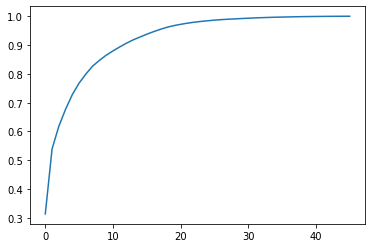

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
T = pca.fit_transform(df_discrete_entropy)
print(pca.explained_variance_ratio_)

# def plotData(plt, data):
#   x = [p[0] for p in data]
#   y = [p[1] for p in data]
#   plt.plot(x, y, '-o')

# plotData(plt, list(zip(range(df_discrete_entropy.shape[1]), pca.explained_variance_ratio_)))
# plt.xlabel("PC")
# plt.xlabel("Explained Variance Ratio")
# plt.figure(figsize = (13, 5))
# plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))

Text(0, 0.5, 'PC2')

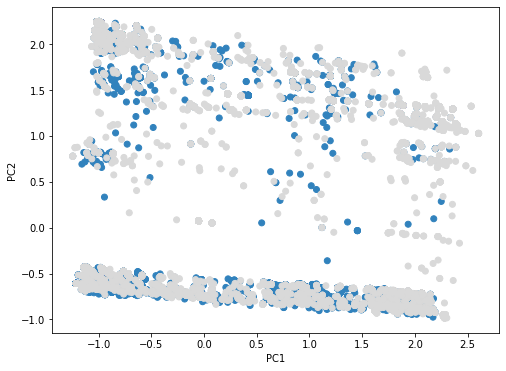

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(T[:, 0],T[:, 1], c=y, cmap=plt.cm.get_cmap('tab20c', 10)) 
plt.xlabel('PC1')
plt.ylabel('PC2')

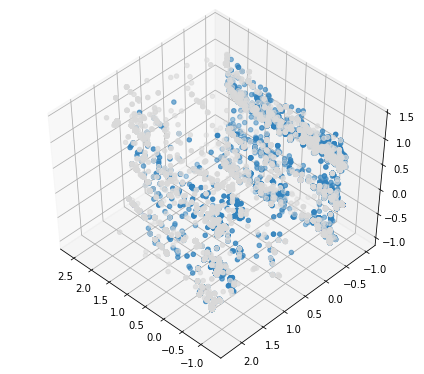

In [0]:
# add 3rd dimension
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.scatter(T[:, 0], T[:, 1], T[:, 2], c=y, cmap=plt.cm.get_cmap('tab20c', 10))
plt.show()

##### LDA
However, the separability seems not quite good, so I decide to use LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(T[:, :10], y)

In [0]:
lda.explained_variance_ratio_

array([1.])

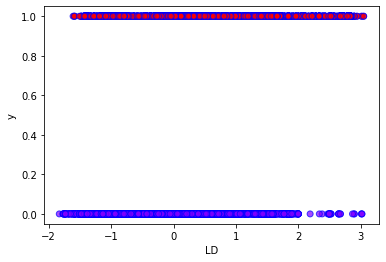

In [0]:
plt.xlabel('LD')
plt.ylabel('y')
plt.scatter(
    X_lda,
    y,
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

##### T-SNE
https://mropengate.blogspot.com/2019/06/t-sne.html

In [0]:
# X: df_discrete_entropy
from sklearn.manifold import TSNE
X_embedded = TSNE().fit_transform(df_discrete_entropy)
X_embedded.shape

(23960, 2)

### Train Test Split
I decide to choose PCA result and consider 5 components

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(T[:, :4], y, test_size=0.33, random_state=42)
X_train_embedded, X_test_embedded, y_train_embedded, y_test_embedded = train_test_split(X_embedded, y, test_size=0.33, random_state=42)
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.33, random_state=42)


## Model
SVM, Decision Tree, Random Forest, Logistic Regression

Neural Network

CNN

### SVM

In [0]:
from sklearn import svm
svm_ = svm.SVC()
svm_.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svm_lda = svm.SVC()
svm_lda.fit(X_train_lda, y_train_lda)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svm_tsne = svm.SVC()
svm_tsne.fit(X_train_embedded, y_train_embedded)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Decision Tree

In [0]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dt_lda = tree.DecisionTreeClassifier(max_depth = 5)
dt_lda.fit(X_train_lda, y_train_lda)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
dt_tsne = tree.DecisionTreeClassifier(max_depth = 5)
dt_tsne.fit(X_train_embedded, y_train_embedded)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [0]:
lr_lda = LogisticRegression(random_state=0).fit(X_train_lda, y_train_lda)

In [0]:
lr_tsne = LogisticRegression(random_state=0).fit(X_train_embedded, y_train_embedded)

### Neural Network

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = keras.Sequential([
    Dense(20, activation=tf.nn.relu, input_shape=[len(X_train[0])]),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dense(20, activation=tf.nn.relu),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'accuracy'])
# model.summary()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50) #防止接近最低點時的左右振盪
model.fit(X_train, y_train, epochs=100, verbose=2, validation_split = 0.1,
                    callbacks=early_stop) #callback: 每輪(epoch)做完要做的事

Epoch 1/100
452/452 - 1s - loss: 0.2134 - mse: 0.2134 - accuracy: 0.6689 - val_loss: 0.1944 - val_mse: 0.1944 - val_accuracy: 0.7067
Epoch 2/100
452/452 - 1s - loss: 0.1960 - mse: 0.1960 - accuracy: 0.7035 - val_loss: 0.1903 - val_mse: 0.1903 - val_accuracy: 0.7204
Epoch 3/100
452/452 - 1s - loss: 0.1926 - mse: 0.1926 - accuracy: 0.7121 - val_loss: 0.1887 - val_mse: 0.1887 - val_accuracy: 0.7192
Epoch 4/100
452/452 - 1s - loss: 0.1887 - mse: 0.1887 - accuracy: 0.7174 - val_loss: 0.1810 - val_mse: 0.1810 - val_accuracy: 0.7279
Epoch 5/100
452/452 - 1s - loss: 0.1867 - mse: 0.1867 - accuracy: 0.7213 - val_loss: 0.1830 - val_mse: 0.1830 - val_accuracy: 0.7217
Epoch 6/100
452/452 - 1s - loss: 0.1856 - mse: 0.1856 - accuracy: 0.7206 - val_loss: 0.1835 - val_mse: 0.1835 - val_accuracy: 0.7291
Epoch 7/100
452/452 - 1s - loss: 0.1852 - mse: 0.1852 - accuracy: 0.7240 - val_loss: 0.1791 - val_mse: 0.1791 - val_accuracy: 0.7323
Epoch 8/100
452/452 - 1s - loss: 0.1768 - mse: 0.1768 - accuracy: 0.7

In [0]:
y_pred_nn = list(map(lambda x: 0 if x < 0.5 else 1, model.predict(X_test)))

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model_lda = keras.Sequential([
    Dense(50, activation=tf.nn.relu, input_shape=(1, 1)),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dense(20, activation=tf.nn.relu),
    Dense(1)
])
model_lda.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model_lda.fit(X_train_lda, y_train_lda, epochs=100, verbose=2, validation_split = 0.1,
                    callbacks=early_stop)
y_pred_nn_lda = list(map(lambda x: 0 if x < 0.5 else 1, model_lda.predict(X_test_lda)))

Epoch 1/100
452/452 - 1s - loss: 0.2008 - accuracy: 0.6961 - val_loss: 0.1886 - val_accuracy: 0.6974
Epoch 2/100
452/452 - 1s - loss: 0.1924 - accuracy: 0.7069 - val_loss: 0.1888 - val_accuracy: 0.7049
Epoch 3/100
452/452 - 1s - loss: 0.1915 - accuracy: 0.7071 - val_loss: 0.1917 - val_accuracy: 0.7061
Epoch 4/100
452/452 - 1s - loss: 0.1907 - accuracy: 0.7112 - val_loss: 0.1896 - val_accuracy: 0.7167
Epoch 5/100
452/452 - 1s - loss: 0.1905 - accuracy: 0.7119 - val_loss: 0.1889 - val_accuracy: 0.7210
Epoch 6/100
452/452 - 1s - loss: 0.1898 - accuracy: 0.7113 - val_loss: 0.1881 - val_accuracy: 0.7049
Epoch 7/100
452/452 - 1s - loss: 0.1892 - accuracy: 0.7104 - val_loss: 0.1876 - val_accuracy: 0.7073
Epoch 8/100
452/452 - 1s - loss: 0.1894 - accuracy: 0.7104 - val_loss: 0.1874 - val_accuracy: 0.7117
Epoch 9/100
452/452 - 1s - loss: 0.1885 - accuracy: 0.7124 - val_loss: 0.1869 - val_accuracy: 0.7186
Epoch 10/100
452/452 - 1s - loss: 0.1892 - accuracy: 0.7125 - val_loss: 0.1876 - val_accura

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model_tsne = keras.Sequential([
    Dense(20, activation=tf.nn.relu, input_shape=[len(X_train_embedded[0])]),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dense(20, activation=tf.nn.relu),
    Dense(1)
])
model_tsne.compile(optimizer='adam', loss='mse', metrics=['mse', 'accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
model_tsne.fit(X_train_embedded, y_train_embedded, epochs=100, verbose=2, validation_split = 0.1,
                    callbacks=early_stop)

Epoch 1/100
452/452 - 1s - loss: 0.2485 - mse: 0.2485 - accuracy: 0.6100 - val_loss: 0.2254 - val_mse: 0.2254 - val_accuracy: 0.6550
Epoch 2/100
452/452 - 1s - loss: 0.2272 - mse: 0.2272 - accuracy: 0.6473 - val_loss: 0.2182 - val_mse: 0.2182 - val_accuracy: 0.6532
Epoch 3/100
452/452 - 1s - loss: 0.2234 - mse: 0.2234 - accuracy: 0.6539 - val_loss: 0.2134 - val_mse: 0.2134 - val_accuracy: 0.6812
Epoch 4/100
452/452 - 1s - loss: 0.2186 - mse: 0.2186 - accuracy: 0.6650 - val_loss: 0.2162 - val_mse: 0.2162 - val_accuracy: 0.6687
Epoch 5/100
452/452 - 1s - loss: 0.2168 - mse: 0.2168 - accuracy: 0.6610 - val_loss: 0.2119 - val_mse: 0.2119 - val_accuracy: 0.6712
Epoch 6/100
452/452 - 1s - loss: 0.2139 - mse: 0.2139 - accuracy: 0.6673 - val_loss: 0.2068 - val_mse: 0.2068 - val_accuracy: 0.6899
Epoch 7/100
452/452 - 1s - loss: 0.2107 - mse: 0.2107 - accuracy: 0.6767 - val_loss: 0.2078 - val_mse: 0.2078 - val_accuracy: 0.6899
Epoch 8/100
452/452 - 1s - loss: 0.2096 - mse: 0.2096 - accuracy: 0.6

In [0]:
y_pred_nn_embedded = list(map(lambda x: 0 if x < 0.5 else 1, model_tsne.predict(X_test_embedded)))

## Evaluation
cross_entropy

confusion matrix

### Cross Entropy for each model

In [0]:
from sklearn.metrics import log_loss, accuracy_score, f1_score
scores = {'Cross Entropy':log_loss,'Accuracy': accuracy_score,'F1 Score': f1_score}

models = ['Model', 'SVM', 'Decision Tree', ' Logistic Regression  ', 'Neural Network'] 
dash='-'
print(f'|{models[0]:^20}|{models[1]:^20}|{models[2]:^20}|{models[3]:^20}|{models[4]:^20}|') 
print('|--------------------|--------------------|--------------------|-----------------------|--------------------|') 

for key in scores.keys():
  print(f'|{key:^20}|{scores[key](y_test, svm_.predict(X_test)):^20.4}|{scores[key](y_test, dt.predict(X_test)):^20.4}|\
  {scores[key](y_test, lr.predict(X_test)):^20.4}|{scores[key](y_test, y_pred_nn):^20.4}|') 

|       Model        |        SVM         |   Decision Tree    | Logistic Regression  |   Neural Network   |
|--------------------|--------------------|--------------------|-----------------------|--------------------|
|   Cross Entropy    |       9.903        |       10.58        |         11.91        |       8.876        |
|      Accuracy      |       0.7133       |       0.6937       |         0.6552       |       0.743        |
|      F1 Score      |       0.6826       |       0.6797       |         0.6593       |       0.7409       |


In [0]:
print(f'|{models[0]:^20}|{models[1]:^20}|{models[2]:^20}|{models[3]:^20}|{models[4]:^20}|') 
print('|--------------------|--------------------|--------------------|-----------------------|--------------------|') 
for key in scores.keys():
  print(f'|{key:^20}|{scores[key](y_test_lda, svm_lda.predict(X_test_lda)):^20.4}|{scores[key](y_test_lda, dt_lda.predict(X_test_lda)):^20.4}|\
  {scores[key](y_test_lda, lr_lda.predict(X_test_lda)):^20.4}|{scores[key](y_test_lda, y_pred_nn_lda):^20.4}|') 

|       Model        |        SVM         |   Decision Tree    | Logistic Regression  |   Neural Network   |
|--------------------|--------------------|--------------------|-----------------------|--------------------|
|   Cross Entropy    |       10.59        |       9.461        |         10.42        |       10.05        |
|      Accuracy      |       0.6933       |       0.7261       |         0.6982       |       0.709        |
|      F1 Score      |       0.6977       |       0.7054       |         0.6862       |       0.6757       |


In [0]:
print(f'|{models[0]:^20}|{models[1]:^20}|{models[2]:^20}|{models[3]:^20}|{models[4]:^20}|') 
print('|--------------------|--------------------|--------------------|-----------------------|--------------------|') 
for key in scores.keys():
  print(f'|{key:^20}|{scores[key](y_test_embedded, svm_tsne.predict(X_test_embedded)):^20.4}|{scores[key](y_test_embedded, dt_tsne.predict(X_test_embedded)):^20.4}|\
  {scores[key](y_test_embedded, lr_tsne.predict(X_test_embedded)):^20.4}|{scores[key](y_test_embedded, y_pred_nn_embedded):^20.4}|') 

|       Model        |        SVM         |   Decision Tree    | Logistic Regression  |   Neural Network   |
|--------------------|--------------------|--------------------|-----------------------|--------------------|
|   Cross Entropy    |       11.44        |       10.87        |         16.19        |       10.79        |
|      Accuracy      |       0.6689       |       0.6853       |         0.5313       |       0.6876       |
|      F1 Score      |       0.6693       |       0.7096       |         0.5154       |       0.6479       |


### Confusion Matrix

In [0]:
columns=2
rows=2
def drawMatrixHeatmap(title):
  fig=plt.figure(figsize=(8, 8))
  for i, mk in zip(range(1, columns*rows +1),matrix.keys()):
      ax = fig.add_subplot(rows, columns, i)
      ax.title.set_text(mk)
      sns.heatmap(matrix[mk], 
                  fmt='d',
                  annot=True,
                  cmap="YlGnBu",
                  linewidths=0.1,
                  linecolor='white')
  fig.suptitle(title)
  plt.show()

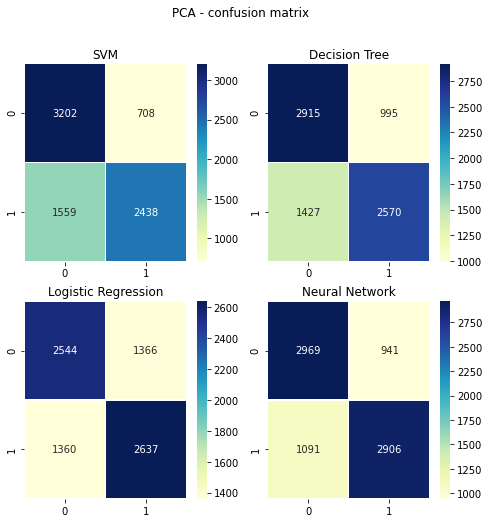

In [0]:
from sklearn.metrics import confusion_matrix
# svm dt lr
svm_pca_matrix = confusion_matrix(y_test, svm_.predict(X_test))
dt_pca_matrix = confusion_matrix(y_test, dt.predict(X_test))
lr_pca_matrix = confusion_matrix(y_test, lr.predict(X_test))
nn_pca_matrix = confusion_matrix(y_test, y_pred_nn)

matrix = {'SVM':svm_pca_matrix, 'Decision Tree':dt_pca_matrix, 
          'Logistic Regression':lr_pca_matrix, 'Neural Network':nn_pca_matrix}
          
drawMatrixHeatmap('PCA - confusion matrix')

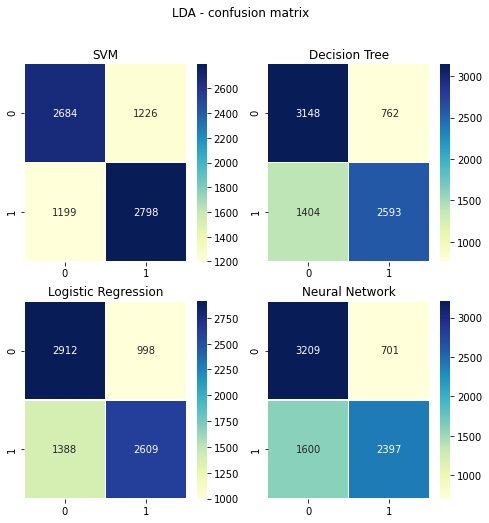

In [0]:
svm_lda_matrix = confusion_matrix(y_test_lda, svm_lda.predict(X_test_lda))
dt_lda_matrix = confusion_matrix(y_test_lda, dt_lda.predict(X_test_lda))
lr_lda_matrix = confusion_matrix(y_test_lda, lr_lda.predict(X_test_lda))
nn_lda_matrix = confusion_matrix(y_test_lda, y_pred_nn_lda)

matrix = {'SVM':svm_lda_matrix, 'Decision Tree':dt_lda_matrix, 
          'Logistic Regression':lr_lda_matrix, 'Neural Network':nn_lda_matrix}

drawMatrixHeatmap('LDA - confusion matrix')

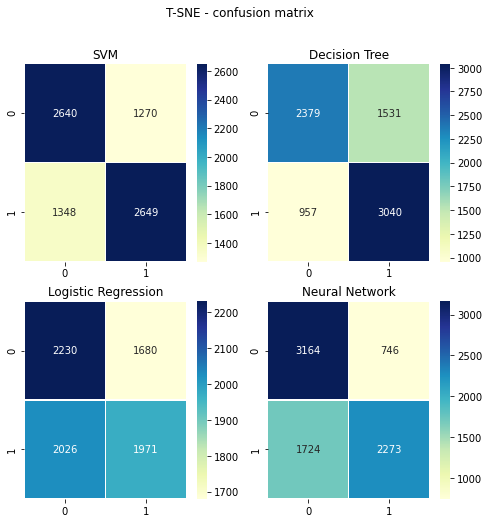

In [0]:
svm_tsne_matrix = confusion_matrix(y_test_embedded, svm_tsne.predict(X_test_embedded))
dt_tsne_matrix = confusion_matrix(y_test_embedded, dt_tsne.predict(X_test_embedded))
lr_tsne_matrix = confusion_matrix(y_test_embedded, lr_tsne.predict(X_test_embedded))
nn_tsne_matrix = confusion_matrix(y_test_embedded, y_pred_nn_embedded)


matrix = {'SVM':svm_tsne_matrix, 'Decision Tree':dt_tsne_matrix, 
          'Logistic Regression':lr_tsne_matrix, 'Neural Network':nn_tsne_matrix}

drawMatrixHeatmap('T-SNE - confusion matrix')

In [0]:
# 看confusion matrix把標錯的點抓出來

# CSR_MATRIX PART

## Get Data

In [0]:
import scipy.sparse as sp
x_shapes =[]
for x in X_files:
  x_shapes.append(x.shape[1])
x_csr = sp.csr_matrix((0, max(x_shapes)), dtype=np.int8)
for x in X_files:
  x_ = sp.csr_matrix((x.data, x.indices, x.indptr), shape=(x.shape[0], max(x_shapes)), copy=True)
  x_csr = sp.vstack((x_csr, x_), format='csr')

x_csr

<2396130x3231961 sparse matrix of type '<class 'numpy.float64'>'
	with 277058644 stored elements in Compressed Sparse Row format>

In [0]:
y = np.concatenate(y_files)
y

array([-1., -1., -1., ...,  1., -1., -1.])

## Sampling

In [0]:
# Sampling and set X and y
sample_idx = np.arange(x_csr.shape[0])
np.random.shuffle(sample_idx)
sample_idx = sample_idx[:int(0.01*x_csr.shape[0])]
x_csr_sampled = x_csr[sample_idx]
y = y[sample_idx]

## Dimension Reduction

[0.01940458 0.10127042 0.05779338 0.02583995 0.02219414 0.02081605
 0.01957447 0.01861254 0.01617998 0.01272307 0.01203123 0.01137909
 0.01092662 0.01009434 0.00994419 0.00920901 0.00874098 0.00793198
 0.00753654 0.00736579 0.00686356 0.00630197 0.00626685 0.00614001
 0.00574512 0.0054272  0.00510615 0.00503761 0.00489403 0.004457
 0.00415592 0.00407417 0.00384373 0.00364578 0.00344597 0.00332371
 0.00326792 0.00320332 0.0031737  0.00297312 0.00289459 0.00285592
 0.00276063 0.00272099 0.00267461 0.00258456 0.00257393 0.00254102
 0.00251555 0.00241664]
0.5274535880416695


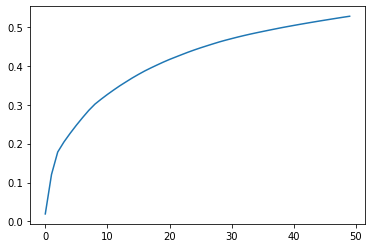

In [0]:
from sklearn.decomposition import TruncatedSVD
# from sklearn.decomposition import PCA
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
x_svd = svd.fit_transform(x_csr_sampled)
print(svd.explained_variance_ratio_)
print(sum(svd.explained_variance_ratio_))

# def plotData(plt, data):
#   x = [p[0] for p in data]
#   y = [p[1] for p in data]
#   plt.plot(x, y, '-o')

# plotData(plt, list(zip(range(x_csr_sampled.shape[1]), svd.explained_variance_ratio_)))
# plt.xlabel("PC")
# plt.xlabel("Explained Variance Ratio")
# plt.figure(figsize = (13, 5))
# plt.show()

plt.plot(np.cumsum(svd.explained_variance_ratio_))

## Split Train and Test

In [0]:
df_svd = pd.DataFrame(x_svd)
df_svd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,8.786402,-1.246949,-0.890888,0.403847,-0.271772,-0.319024,-0.093036,-0.000586,0.481732,-0.674414,-0.016920,0.010800,-0.002141,-0.082202,-0.105290,0.041043,0.094155,0.280848,0.017589,0.355406,0.250656,-0.268107,-0.967933,-0.412936,0.101122,0.190658,-0.374816,0.098365,0.185772,0.340851,0.776881,-0.644707,-0.495261,-0.228560,-0.244018,-0.212215,0.311004,-0.250772,0.215925,-0.017532,0.308262,-0.296247,0.001793,0.087976,-0.012560,-0.121180,0.030556,-0.323583,0.126145,-0.112428
1,8.859867,3.066564,-0.349874,-0.705083,-0.377033,-1.429697,-0.114570,1.514789,-1.270961,-0.297610,-1.926461,0.988524,1.132660,-0.023008,-0.251555,0.087413,0.297094,-0.176636,1.082661,-0.903608,0.353898,-0.075235,0.498104,0.913629,-0.030194,0.097577,-0.354024,0.560868,0.032065,-0.024810,0.421584,-0.091965,0.043333,0.211275,0.197173,-0.179458,-0.099718,0.300542,-0.097225,0.240798,0.308807,-0.200685,-0.151879,-0.542206,-0.105773,0.307293,0.008480,-0.223335,-0.133424,0.045805
2,8.466749,-1.027628,-0.381867,0.740270,0.374123,-0.432420,-0.509678,-0.776514,0.377053,0.522683,0.353205,-0.226653,0.286131,0.400331,0.279283,-0.053537,-0.396515,-0.062377,0.891964,0.077521,0.101186,0.396103,0.202322,-0.913228,0.165493,0.328427,0.227719,-0.288962,-0.173969,0.147764,0.078781,-0.494407,-0.294346,0.063115,-0.103611,0.156823,0.111565,-0.216231,-0.225243,0.107890,0.294914,-0.396871,0.087709,0.372765,-0.104827,0.085387,0.346132,-0.487090,-0.168621,0.373623
3,8.727386,-1.532906,-0.932897,-0.012423,-0.467669,0.134172,-0.401464,0.364651,-1.219832,0.983815,-0.429580,-0.137993,-0.018639,-0.483083,0.417803,-0.021966,0.382451,0.497174,-0.216441,-0.317820,-0.120145,-0.421703,0.372994,0.211997,0.202079,-0.446645,-0.047798,0.050640,0.042574,0.090475,-0.179755,-0.017512,0.242963,-0.049898,0.029501,-0.058848,-0.051695,0.187802,-0.382079,-0.424659,-0.030518,-0.247790,0.223913,-0.059000,0.291074,-0.094848,-0.117228,-0.033680,-0.011028,-0.018734
4,7.583432,-0.809666,2.203958,0.086497,1.839038,-1.568452,-0.021169,0.331752,-0.678564,0.138243,0.452281,-0.461898,1.352946,0.063787,0.690374,-0.052210,0.062610,0.025565,-0.450555,-0.064439,0.089164,0.633548,0.746538,-0.724389,0.446638,0.223364,-0.713576,-0.902729,-0.394142,0.347845,0.001000,0.891970,1.039991,-0.790969,0.421539,-0.664390,0.550976,0.172582,1.154868,-0.157852,0.353995,-0.357206,-0.668442,0.240143,0.306044,-0.027249,-0.319741,0.292313,0.753356,0.363687


In [0]:
le = LabelEncoder()
y = le.fit_transform(y)

In [0]:
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(df_svd, y, test_size=0.33, random_state=42)

## Model

In [0]:
svm = svm.SVC()
svm.fit(X_train_svd, y_train_svd)

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train_svd, y_train_svd)

lr = LogisticRegression(random_state=0).fit(X_train_svd, y_train_svd)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
model = keras.Sequential([
    Dense(50, activation=tf.nn.relu, input_shape=(1, 50)),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dense(20, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(50, activation=tf.nn.relu),
    Dense(50, activation=tf.nn.relu),
    Dense(20, activation=tf.nn.relu),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50) #防止接近最低點時的左右振盪
model.fit(X_train_svd, y_train_svd, epochs=100, verbose=2, validation_split = 0.1,
                    callbacks=early_stop) #callback: 每輪(epoch)做完要做的事

Epoch 1/100
452/452 - 1s - loss: 0.0639 - accuracy: 0.9270 - val_loss: 0.0448 - val_accuracy: 0.9595
Epoch 2/100
452/452 - 1s - loss: 0.0336 - accuracy: 0.9617 - val_loss: 0.0510 - val_accuracy: 0.9608
Epoch 3/100
452/452 - 1s - loss: 0.0329 - accuracy: 0.9617 - val_loss: 0.0454 - val_accuracy: 0.9664
Epoch 4/100
452/452 - 1s - loss: 0.0307 - accuracy: 0.9641 - val_loss: 0.0389 - val_accuracy: 0.9626
Epoch 5/100
452/452 - 1s - loss: 0.0297 - accuracy: 0.9657 - val_loss: 0.0427 - val_accuracy: 0.9670
Epoch 6/100
452/452 - 1s - loss: 0.0296 - accuracy: 0.9651 - val_loss: 0.0372 - val_accuracy: 0.9645
Epoch 7/100
452/452 - 1s - loss: 0.0279 - accuracy: 0.9675 - val_loss: 0.0365 - val_accuracy: 0.9614
Epoch 8/100
452/452 - 1s - loss: 0.0268 - accuracy: 0.9689 - val_loss: 0.0308 - val_accuracy: 0.9682
Epoch 9/100
452/452 - 1s - loss: 0.0263 - accuracy: 0.9694 - val_loss: 0.0330 - val_accuracy: 0.9682
Epoch 10/100
452/452 - 1s - loss: 0.0263 - accuracy: 0.9684 - val_loss: 0.0325 - val_accura

In [0]:
y_pred_nn_svd = list(map(lambda x: 0 if x < 0.5 else 1, model.predict(X_test_svd)))

In [0]:
print(f'|{models[0]:^20}|{models[1]:^20}|{models[2]:^20}|{models[3]:^20}|{models[4]:^20}|') 
print('|--------------------|--------------------|--------------------|-----------------------|--------------------|') 
for key in scores.keys():
  print(f'|{key:^20}|{scores[key](y_test_svd, svm.predict(X_test_svd)):^20.4}|{scores[key](y_test_svd, dt.predict(X_test_svd)):^20.4}|\
  {scores[key](y_test_svd, lr.predict(X_test_svd)):^20.4}|{scores[key](y_test_svd, y_pred_nn_svd):^20.4}|') 

|       Model        |        SVM         |   Decision Tree    | Logistic Regression  |   Neural Network   |
|--------------------|--------------------|--------------------|-----------------------|--------------------|
|   Cross Entropy    |       1.354        |       2.276        |         1.341        |       1.201        |
|      Accuracy      |       0.9608       |       0.9341       |         0.9612       |       0.9652       |
|      F1 Score      |       0.9422       |       0.9004       |         0.9422       |       0.9474       |


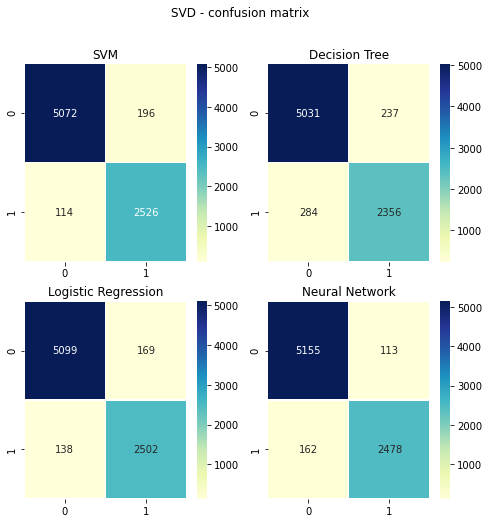

In [0]:
from sklearn.metrics import confusion_matrix
# svm dt lr
svm_svd_matrix = confusion_matrix(y_test_svd, svm.predict(X_test_svd))
dt_svd_matrix = confusion_matrix(y_test_svd, dt.predict(X_test_svd))
lr_svd_matrix = confusion_matrix(y_test_svd, lr.predict(X_test_svd))
nn_svd_matrix = confusion_matrix(y_test_svd, y_pred_nn_svd)

matrix = {'SVM':svm_svd_matrix, 'Decision Tree':dt_svd_matrix, 
          'Logistic Regression':lr_svd_matrix, 'Neural Network':nn_svd_matrix}

drawMatrixHeatmap('SVD - confusion matrix')

# COMPARISON

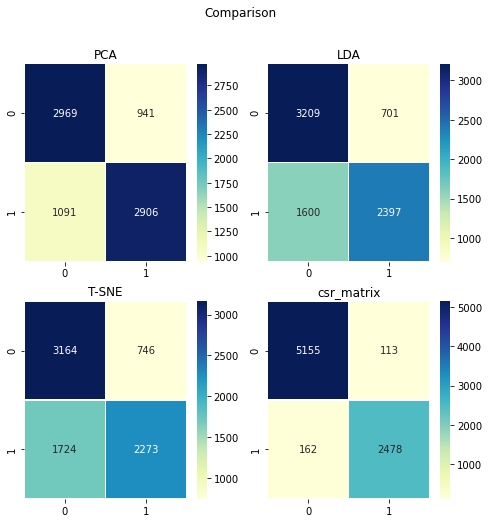

In [0]:
matrix = {'PCA':nn_pca_matrix, 'LDA':nn_lda_matrix, 'T-SNE':nn_tsne_matrix, 'csr_matrix':nn_svd_matrix}
drawMatrixHeatmap('Comparison')